In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 14.8 MB 48.9 MB/s 
     |████████████████████████████████| 1.2 MB 45.5 MB/s 
     |████████████████████████████████| 4.0 MB 44.3 MB/s 
     |████████████████████████████████| 132 kB 46.4 MB/s 
     |████████████████████████████████| 462 kB 51.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=6596cf8cfd692cc80dd8bf8a2b0b1592472ff99adc3f05f8d86ba1a07d2fcfb1
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input, Sequential
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.layers import LSTM, Bidirectional, TimeDistributed
from tensorflow.python.ops.math_ops import reduce_prod
import os
import json
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/Corpus14407_DM_pts_33185_expanded.csv', sep=',',
                 names=['PatientID','Age','Gender', 'VAN','Note','Examination','Test','Result','PC','condition','family',
                        'Medicine','disease','ICD10CM','Diagnosed'], header=None)
df.head(25)

,PatientID,Age,Gender,VAN,Note,Examination,Test,Result,PC,condition,family,Medicine,disease,ICD10CM,Diagnosed
0,PatientID,Age,Gender,VAN,Note,Examination,Test,Result,PC,Condition,Family,Medication,Disease,ICD-10-CM,Diagnosed
1,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),MCHC,33.3,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
2,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),MCH,24.1,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
3,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),HCT,35.1,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
4,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),"RBC, Total",4.86,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
5,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),WBC Total,12300,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
6,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),Platelet Count,514000,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
7,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,Fresh Frozen Plasma,Issue Time,0.01875,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
8,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),"RBC, Total",4.78,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes
9,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),Basophil,0,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes


In [ ]:
df['MedProfile'] = (df['Examination']+ ' | '+df['Test']+' | '+df['Result'] + ' | ' + df['condition']).apply(lambda x: x.split(',')[-1].strip() if not pd.isna(x) else df.dropna(subset=['condition'], inplace=True))
df['Diagnosis'] = (df['Diagnosed']+' | '+df['ICD10CM']).apply(lambda x: x.split(',')[-1].strip()if not pd.isna(x) else 0.0)
df.head()

,PatientID,Age,Gender,VAN,Note,Examination,Test,Result,PC,condition,family,Medicine,disease,ICD10CM,Diagnosed,MedProfile,Diagnosis
0,PatientID,Age,Gender,VAN,Note,Examination,Test,Result,PC,Condition,Family,Medication,Disease,ICD-10-CM,Diagnosed,Examination | Test | Result | Condition,Diagnosed | ICD-10-CM
1,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),MCHC,33.3,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes,ankle swelling,Steroid Induced Diabetes | E09.9
2,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),MCH,24.1,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes,ankle swelling,Steroid Induced Diabetes | E09.9
3,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),HCT,35.1,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes,ankle swelling,Steroid Induced Diabetes | E09.9
4,102579,79,Female,180407jVh1,c/o dry mouth\nankle swelling\n\non Humulin R ...,CBC Diff Profile (CS11),"RBC, Total",4.86,Known metastatic Carcinoma of ovary\nstarted o...,"dry mouth,\nankle swelling",NaN,"Humulin, solumedrol, deltacortil\nBG 400-500",metastatic Carcinoma of ovary,E09.9,Steroid Induced Diabetes,ankle swelling,Steroid Induced Diabetes | E09.9


In [ ]:
profile = list(df.MedProfile.unique())
print(str(profile))

['Examination | Test | Result | Condition', 'ankle swelling', None, 'Total | 4.39 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Basophil | 0 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | MCH | 25.3 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | MCHC | 31.8 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Lymphocytes | 22 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | MCV | 79.5 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Monocytes | 6 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Hemoglobin | 11.1 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | HCT | 34.9 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | MPV | 11.8 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Platelet Count | 198000 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Eosinophils | 2 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | Neutrophils | 70 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | RDW | 13.2 | 11/52 weeks pregnant', 'CBC Diff Profile (CS11) | WBC 

In [ ]:
profile2idx = {v:k for k, v in enumerate(profile)}
profile2idx

{'': 107,
 '1 Hr Post dinner <140': 83,
 'ACTH 12.6': 387,
 'AFB Smear | Acid Fast Bacilli | Not Seen | BG >200 mg/dl': 218,
 'AFB Smear | Epithelial Cells | Nil | BG >200 mg/dl': 214,
 'AFB Smear | PUS Cells | Occasional | BG >200 mg/dl': 217,
 'AFB Smear | RBCs | Nil | BG >200 mg/dl': 204,
 'AFB Smear | Source | CSF | BG >200 mg/dl': 212,
 'AFB Smear | Yeast Cells | Nil | BG >200 mg/dl': 225,
 'APTT | APTT | 28.2 | chest clear': 533,
 'APTT | APTT | 28.3 | HYPERGLYCEMIC': 497,
 'APTT | APTT | 28.9 | HYPERGLYCEMIC': 504,
 'APTT | APTT | 46.2 | SEVERE CONSTIPATION': 318,
 'APTT | APTT | 59.9 | HYPERGLYCEMIC': 472,
 'Abdominal pain': 396,
 'Abo Group & Rh | ABO Group | B | 11/52 weeks pregnant': 34,
 'Abo Group & Rh | Rh (ANTI D) | Positive | 11/52 weeks pregnant': 33,
 'Admitted': 524,
 'Albumin | Albumin Serum | 2.47 | BG >200 mg/dl': 209,
 'Albumin | Albumin Serum | 4.07 | BG >200 mg/dl': 175,
 'Alk Phosphatase | Alkaline Phosphatase | 292 | minimal pain': 286,
 'BUN | BUN | 10 | leg

In [ ]:
idx2profile = {k:v for k, v in enumerate(profile)}
idx2profile

{0: 'Examination | Test | Result | Condition',
 1: 'ankle swelling',
 2: None,
 3: 'Total | 4.39 | 11/52 weeks pregnant',
 4: 'CBC Diff Profile (CS11) | Basophil | 0 | 11/52 weeks pregnant',
 5: 'CBC Diff Profile (CS11) | MCH | 25.3 | 11/52 weeks pregnant',
 6: 'CBC Diff Profile (CS11) | MCHC | 31.8 | 11/52 weeks pregnant',
 7: 'CBC Diff Profile (CS11) | Lymphocytes | 22 | 11/52 weeks pregnant',
 8: 'CBC Diff Profile (CS11) | MCV | 79.5 | 11/52 weeks pregnant',
 9: 'CBC Diff Profile (CS11) | Monocytes | 6 | 11/52 weeks pregnant',
 10: 'CBC Diff Profile (CS11) | Hemoglobin | 11.1 | 11/52 weeks pregnant',
 11: 'CBC Diff Profile (CS11) | HCT | 34.9 | 11/52 weeks pregnant',
 12: 'CBC Diff Profile (CS11) | MPV | 11.8 | 11/52 weeks pregnant',
 13: 'CBC Diff Profile (CS11) | Platelet Count | 198000 | 11/52 weeks pregnant',
 14: 'CBC Diff Profile (CS11) | Eosinophils | 2 | 11/52 weeks pregnant',
 15: 'CBC Diff Profile (CS11) | Neutrophils | 70 | 11/52 weeks pregnant',
 16: 'CBC Diff Profile (C

In [ ]:
labels = list(df.Diagnosis.unique())
print(str(labels))

['Diagnosed | ICD-10-CM', 'Steroid Induced Diabetes | E09.9', 'Gestational Diabetes | O24.4', 'DM | E08-E13', 'COPD | J44.9', 'THYROID | E07.9', 'SUBCLINICAL HYPOTHYROIDISM | E02', 'Prediabetes | R73.03', 'Primary Infertility | N97.9', 'Secondary Diabetes | E13.-', 'Primary Hyperparathyrodism | E21.0', 'HORMONAL | Z19', 'Parkinson Disease Plus | G20', 'Toxic Epidermal Necrolysis secondary to Meloxicam | L51.2', 'Constipation | K59.00', 'LUNGS INFECTIONS | B67.1', 'KIDNEY INFECTION | Q63.1', 'PNEUMONIA | A54.84', 'Amiodarone associated Hyperthyroidism (Type 1) | E05.90', 'ANEMIA | D64.9', 'Pituitary Macroadenoma Treated with Transphenoidal surgery | D35.2', 'Sheehan Syndrome | E23.0', 'Postural Drop | M40.00', 'Vitamin D Deficiency | E55.9', 'Stroke | R29.7', 'OSTEOARTHIRITIS | M19.90', 'Urinary Tract Infection | N39.0', 'Lower Respiratory Tract Infection | J22', 'Thyroiditis | E06', 'Cellulitis | L03.90', 'Hypoglycaemia | E16.2', 'Obesity | E66.9', 'SUBCLINICAL HYPOTHYROIDISM | E03.9']

In [ ]:
label2idx = {v:k for k, v in enumerate(labels)}
label2idx

{'ANEMIA | D64.9': 19,
 'Amiodarone associated Hyperthyroidism (Type 1) | E05.90': 18,
 'COPD | J44.9': 4,
 'Cellulitis | L03.90': 29,
 'Constipation | K59.00': 14,
 'DM | E08-E13': 3,
 'Diagnosed | ICD-10-CM': 0,
 'Gestational Diabetes | O24.4': 2,
 'HORMONAL | Z19': 11,
 'Hypoglycaemia | E16.2': 30,
 'KIDNEY INFECTION | Q63.1': 16,
 'LUNGS INFECTIONS | B67.1': 15,
 'Lower Respiratory Tract Infection | J22': 27,
 'OSTEOARTHIRITIS | M19.90': 25,
 'Obesity | E66.9': 31,
 'PNEUMONIA | A54.84': 17,
 'Parkinson Disease Plus | G20': 12,
 'Pituitary Macroadenoma Treated with Transphenoidal surgery | D35.2': 20,
 'Postural Drop | M40.00': 22,
 'Prediabetes | R73.03': 7,
 'Primary Hyperparathyrodism | E21.0': 10,
 'Primary Infertility | N97.9': 8,
 'SUBCLINICAL HYPOTHYROIDISM | E02': 6,
 'SUBCLINICAL HYPOTHYROIDISM | E03.9': 32,
 'Secondary Diabetes | E13.-': 9,
 'Sheehan Syndrome | E23.0': 21,
 'Steroid Induced Diabetes | E09.9': 1,
 'Stroke | R29.7': 24,
 'THYROID | E07.9': 5,
 'Thyroiditis 

In [ ]:
idx2label = {k:v for k, v in enumerate(labels)}
idx2label

{0: 'Diagnosed | ICD-10-CM',
 1: 'Steroid Induced Diabetes | E09.9',
 2: 'Gestational Diabetes | O24.4',
 3: 'DM | E08-E13',
 4: 'COPD | J44.9',
 5: 'THYROID | E07.9',
 6: 'SUBCLINICAL HYPOTHYROIDISM | E02',
 7: 'Prediabetes | R73.03',
 8: 'Primary Infertility | N97.9',
 9: 'Secondary Diabetes | E13.-',
 10: 'Primary Hyperparathyrodism | E21.0',
 11: 'HORMONAL | Z19',
 12: 'Parkinson Disease Plus | G20',
 13: 'Toxic Epidermal Necrolysis secondary to Meloxicam | L51.2',
 14: 'Constipation | K59.00',
 15: 'LUNGS INFECTIONS | B67.1',
 16: 'KIDNEY INFECTION | Q63.1',
 17: 'PNEUMONIA | A54.84',
 18: 'Amiodarone associated Hyperthyroidism (Type 1) | E05.90',
 19: 'ANEMIA | D64.9',
 20: 'Pituitary Macroadenoma Treated with Transphenoidal surgery | D35.2',
 21: 'Sheehan Syndrome | E23.0',
 22: 'Postural Drop | M40.00',
 23: 'Vitamin D Deficiency | E55.9',
 24: 'Stroke | R29.7',
 25: 'OSTEOARTHIRITIS | M19.90',
 26: 'Urinary Tract Infection | N39.0',
 27: 'Lower Respiratory Tract Infection | J2

In [ ]:
grouped = df.groupby('PatientID')

x = []
y = []


for _, group in grouped:
    x.append(list(group.MedProfile.values))
    y.append(list(group.Diagnosis.values))

print(x[:2])
print(y[:2])

[['ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle swelling', 'ankle s

In [ ]:
x = [[profile2idx[l] for l in profile] for profile in x]
y = [[label2idx[d] for d in labels] for labels in y]

print(x[:2])
print(y[:2])

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

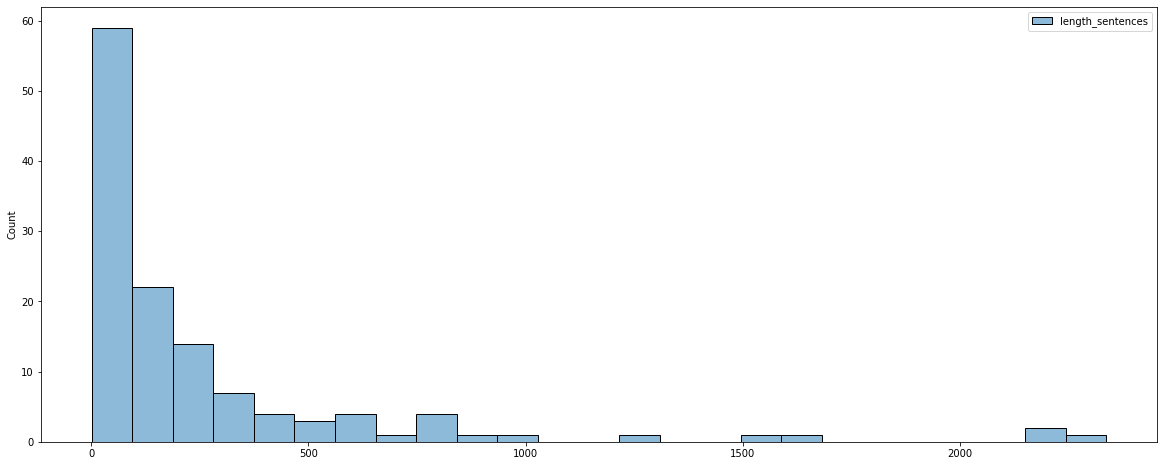

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(pd.DataFrame({'length_sentences': [len(arr) for arr in x]}))

In [ ]:
x = keras.preprocessing.sequence.pad_sequences(x, maxlen=20, padding='pre', truncating='pre', value=profile2idx.get('Examination | Test | Result | Condition'))
y = keras.preprocessing.sequence.pad_sequences(y, maxlen=20, padding='pre', truncating='pre', value=label2idx.get('Diagnosed | ICD-10-CM'))
print(x.shape, y.shape)

(126, 20) (126, 20)


In [ ]:
print(x)

[[  1   1   1 ...   1   1   1]
 [ 41  42  43 ...  55  56  57]
 [  0   0   0 ...   0   0  58]
 ...
 [573 573 573 ... 573 573 573]
 [107   2   2 ... 107 107 107]
 [  0   0   0 ...   0   0   0]]


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.20, random_state=20)

In [ ]:
print(X_train.shape, Y_train.shape)

(100, 20) (100, 20)


In [ ]:
print(X_valid.shape, Y_valid.shape)

(26, 20) (26, 20)


In [ ]:
from tensorflow.python.keras import backend as K

def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon())), precision, recall

In [ ]:
from tensorflow.python.keras.optimizer_v2.nadam import Nadam
from tensorflow._api.v2.math import reduce_prod
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
regularizers.l2(0.001)

maxlen=max([len(s) for s in x])
input_lyr = keras.layers.Input((100))
embedding_lyr = keras.layers.Embedding(len([profile]), 32, input_length=maxlen)(input_lyr)
voc_size = 10000
max_features=10000
embedding_size= 3
lstm_output_size = 64
learning_rate=0.05
model = Sequential()
model.add(Embedding(voc_size, 64, input_length=maxlen))
model.add(Bidirectional(LSTM(25, activation="relu", return_sequences=True, recurrent_activation="relu")))
model.add(Bidirectional(LSTM(25, activation="relu", return_sequences=True, recurrent_activation="relu")))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(lstm_output_size)))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(90, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='softmax'))

acc = []
opt = Nadam(learning_rate)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', f1_score])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 64)            640000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 20, 50)            18000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 20, 50)            15200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               58880     
_________________________________________________________________
dense_7 (Dense)              (None, 80)                10320     
_________________________________________________________________
dense_8 (Dense)              (None, 70)               

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(X_valid, Y_valid))

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.6931 - accuracy: 0.8200 - f1_score: 726666688.0000 - val_loss: -0.6642 - val_accuracy: 0.0000e+00 - val_f1_score: 849999936.0000
Epoch 2/10
1/1 [==============================] - 0s 148ms/step - loss: 0.0946 - accuracy: 0.0200 - f1_score: 713333312.0000 - val_loss: -343.7381 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3593
Epoch 3/10
1/1 [==============================] - 0s 143ms/step - loss: -141.8223 - accuracy: 0.0200 - f1_score: 0.3657 - val_loss: -16875.4863 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3593
Epoch 4/10
1/1 [==============================] - 0s 142ms/step - loss: -7005.2295 - accuracy: 0.0200 - f1_score: 0.3657 - val_loss: -235308.0625 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3593
Epoch 5/10
1/1 [==============================] - 0s 140ms/step - loss: -97676.4062 - accuracy: 0.0200 - f1_score: 0.3657 - val_loss: nan - val_accuracy: 0.7308 - val_f1_score: nan
Epoch 6/10
1/1 [==============

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

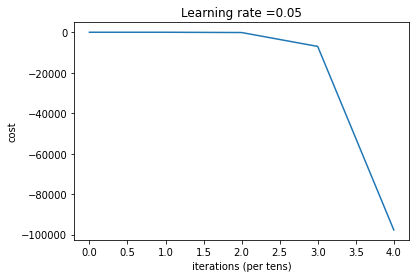

1/1 [==============================] - 0s 28ms/step - loss: nan - accuracy: 0.7308 - f1_score: nan


Accuracy on test set is 0.7307692170143127
and f1 score: nan


In [ ]:
plt.plot(np.squeeze(history.history["loss"]))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

results = model.evaluate(X_valid, Y_valid)
print("\n\nAccuracy on test set is {}".format(results[1]))
print("and f1 score: {}".format(results[2]))

In [ ]:
import itertools
i = np.random.randint(0, X_valid.shape[0]) #659
p = model.predict(np.array([X_valid[i]]))
p = np.argmax(p, axis=-1)

y_true = Y_valid[i]

print("{:30}\t{:30}\t {}\n".format("Medical Profile of Patient", "True", "Diagnosed"))
print("-" *100)
for w, true, pred in zip(X_valid[i], Y_valid[i], itertools.repeat(p[0])):
    print("{:20}\t{}\t{}".format(profile[w-1], labels[true], labels[pred]))

Medical Profile of Patient    	True                          	 Diagnosed

----------------------------------------------------------------------------------------------------
HBA1C 9.8%          	Diagnosed | ICD-10-CM	Diagnosed | ICD-10-CM
HBA1C 9.8%          	Diagnosed | ICD-10-CM	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infection | N39.0	Diagnosed | ICD-10-CM
no family history of thyroid disease	Urinary Tract Infecti

In [ ]:
model.save("Bi-LSTMDenseSequential.h5")

In [ ]:
!pip install 'h5py'

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
model = load_model('Bi-LSTMDenseSequential.h5', custom_objects= {'f1_score': f1_score})

In [ ]:
def evaluate_this_model(model):
    h = model.fit(X_train, Y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(X_valid, Y_valid))
    results = model.evaluate(X_valid, Y_valid)

    plt.plot(np.squeeze(history.h["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    print("\n\nAccuracy on test set is {}".format(results[1]))

In [ ]:
evaluate_this_model(model)

Epoch 1/10


TypeError: in user code:

    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:815 run_step  *
        with tf.control_dependencies(_minimum_control_deps(outputs)):
    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2863 _minimum_control_deps
        outputs = tf.nest.flatten(outputs, expand_composites=True)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/util/nest.py:416 flatten
        return _pywrap_utils.Flatten(structure, expand_composites)

    TypeError: '<' not supported between instances of 'function' and 'str'
